<h1 align="center"> Analyzing Solar Panel Deployment from a Climate Equity and Efficiency Perspective </h1> 
<br>
<center> Catherine Quaintance, Hannah Reyes, Marco Tortolani, Emily Wang, Xinyu Wu </center>
<center> <i> Northeastern University, Boston, MA, USA </i> </center>

<h1> <center> Introduction </center> </h1>
With renewable energy being at the forefront of potential progress, the United States remains behind in implementing one of the most accessible modes of clean energy: solar energy.  While it seems wasteful not to harness energy that comes to us at no cost, the solar panels needed to collect this energy can be quite costly, with an average gross price of $15,600 in Massachusetts [2].  This large price tag can deter many potential implementers, which is why Google established Google Project Sunroof, a program that encourages data analysis of solar panel costs and efficiency in the United States. Google Project Sunroof also took it upon themselves to create an extensive dataset of variables related to solar panel deployment. As a group, we hope to analyze and visualize this dataset to better understand where solar panel deployment is most used and would be viable in the US. By combining this data with other datasets of US demographics, we hope to find trends of overlap between where solar panels are viable, and which socioeconomic classes are being left behind in the transition to solar energy. Through this overlap, we can develop a better understanding of which people and places would benefit from the prospect of solar panels in the US, and provide suggestions for homeowners and policymakers to increase energy efficiency and minimize our carbon footprints.

<h3> <center> Background & Significance </center> </h3>
In this project, we chose to look at solar energy because it is a renewable energy source that homeowners and households actually have the power to install and use. However, as of 2019, only 6% of homes use solar power [1]. Thus, we would like to better understand why this number is so low, how we can increase solar panel deployment, and the general accessibility of solar power. When examining these questions, we felt that taking an efficiency and environmental justice/equity perspective would be most reasonable. With the former, we explore efficiency by looking at solar panel deployment numbers in relation to carbon offset, and also yearly sunlight. This will allow us to understand which geographic regions are most suitable for solar panels and which areas are behind in their solar panel deployment. In taking a climate equity perspective, we can better understand the disparities in accessibility based off of socioeconomic measures including unemployment, poverty, and income. Generally, we define climate equity as the idea that climate change poses the greatest threats to those that are least responsible. Through our visualizations, we hope to identify which populations have the hardest time deploying solar energy. This is impactful considering that solar panels have high installation prices but can significantly reduce per-household spending on electricity in the long-run. As of 2017, studies suggest that lower-income US households spend 8% of their income on electricity in comparison to 2.9% of income for the average household [4].

Our research has use cases primarily for policy-making but also for individual homeowners. Following our research analysis, we have policy suggestions for the local, state, and federal government levels that we believe would be effective in alleviating the disparity between lower and higher socioeconomic status households' solar panel deployment. We also put in our two-cents on what individuals homeowners may take away from our analysis.
<br>


<h3> <center> Research Questions </center> </h3>

For this project, we primarily developed two research questions, with the first addressing efficiency in solar panel deployment and the latter touching upon correlations between socioeconomic variables and solar panel usage.

1. How does solar panel usage and solar panel/energy efficiency vary by geographic location?
- Are geographic areas with higher yearly sunlight (measured in kilowatts) correlated with more solar panel installations?
- Is there a relationship between carbon offset, yearly sunlight, and installation count?
    
2. In what ways are solar panel deployment correlated with socioeconomic measures (income, poverty, unemployment, etc.)?
- Have poverty, unemployment, and income levels affected solar deployment levels?
- If not, how can we determine feasibility for solar panel deployment in states that currently lack solar?

<h3> <center> Hypotheses </center> </h3>

1. If a region has more sunlight, then it will also have higher solar panel deployment numbers. As a result, carbon offset will also be higher in those geographic areas.

2. Lower socioeconomic status (high unemployment, high poverty, low income) will correlate with lesser numbers of solar panel installation because solar panels can be costly to install and less accessible to those populations.    
<br>

<h1> <center> Data Sources & Methods </center> </h1>

To find our data sources, we primarily searched through Kaggle's datasets. We had first decided on an overarching topic of interest (renewable energy) before trying to find a specific dataset that matched our goals. Originally, we had some ideas on finding datasets about renewable energy from around the globe but this ended up being too ambitious and hard to find decent data for. After searching through Kaggle, we found the Google Project Sunroof dataset which we felt fit our desires. Solar energy was the most compelling because, as we've mentioned previously, the average homeowner can choose to install and use solar energy, and the barriers of entry are rather low (other than the cost of installation). After noticing that the Google Project Sunroof dataset is split up by census tract, we were able to shift our scope to include a more unique, climate equity perspective. We went back to Kaggle to find a US demographic dataset that used census tracts, hence the 'US Energy, Census, and GDP' dataset.    

<i> Solar Panel Deployment + Effiency </i>

https://www.kaggle.com/jboysen/google-project-sunroof?select=sunroof_solar_potential_by_censustract.csv

1. Google Project Sunroof (2017)
<br>
Established by Google in 2015, Project Sunroof tracks solar panel usage, and gives users an idea as to how they can reduce their electricity spending by installing solar panels. In the dataset, there are many unique data points including: 'count qualified' (number of buildings in Google Maps that are suitable for solar); 'percent covered' (number of buildings in Google Maps which is covered by Project Sunroof); and 'number of panels' for North, East, South, and West-facing roofs.

In our data analysis, we used the following variables provided in the Google Project Sunroof dataset:
- Existing installation count (# of buildings estimated to have a solar installation)
- Percent qualified (% of buildings covered by Project Sunroof that are suitable for solar panel installation)
- Count qualified (# of buildings in Google Maps that are suitable for solar panel installation)
- Yearly sunlight kwh total (total solar energy generation potential or all roof space in the region)
- Carbon offset metric (the potential carbon dioxide abatement of the solar capacity)

<i> Socioeconomic Breakdown </i>

https://www.kaggle.com/muonneutrino/us-census-demographic-data?select=acs2015_census_tract_data.csv

2. US Energy, Census, and GDP (2017)
<br>
Taken from the American Community Survey, this dataset is collected by the US Census Bureau. We chose to use the 2017 dataset, since it matches the Google Solar Project dataset year. The dataset has data on gender, race, ethnicity, income, poverty, child poverty, profession (service, office, construction, etc.), work commute (work at home, drive, carpool, walk, etc.), and employment (self employed, unemployed, public vs private, family work, etc.).

The specific columns of the dataset which we used in our analysis are:
- Income
- Unemployment 
- Poverty

<h3> <center> General Methodology </center> </h3>

1. Clean, merge, and group datasets as pandas dataframes
2. Convert dataframes to geodataframes (geometry: polygon, point)
3. Create single and multi-layered geovisualizations
4. Plot regression correlations that correspond with the geovisualizations
5. Draw conclusions and make recommendations to help mend the gap between deployment levels

<h1> <center> Analysis and Results </center> </h1>

In [33]:
# Import libraries

import csv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
%matplotlib inline

# Data Cleaning

The following functions involve importing and managing the two main datasets: solar panel data and US census data. Since this census data comes organized by tract or county, we implemented multiple functions to join these datasets together, and later grouped them by state for more general and intuitive visualizations. Many of the following columns are creating subdivisions of the dataset and extracting key features to implement in our visualizations.

In [34]:
# function to import data 
def to_df(filename):
    """
    Convert csv to dataframe, dropping rows with NaN
    input: csv file name
    output: dataframe
    """
    df = pd.read_csv(filename)
    df.dropna(inplace=True)
    return df

# function to append census tract data to solar data on solar column region_name
def tract_join(sunroof_df, tract_df):
    '''
    Join df2 first column to df1.region_name:
    input: df, df
    output: df
    '''
    df_new = pd.merge(sunroof_df, tract_df.rename(columns={tract_df.columns[0]:"region_name"}), how='inner', on=["region_name"])
    return df_new

# functions to append census state data to solar data on solar column state_name
def state_join(sunroof_df, tract_df):
    '''
    Join df2 second column to df1.state_name:
    input: df, df
    output: df
    '''
    df_new = pd.merge(sunroof_df, tract_df.rename(columns={tract_df.columns[1]:"state_name"}), how='inner', on=["state_name"])
    return df_new

In [35]:
#organizing datasets to subsets by 

# the main census and sunroof datasets
census2017_df = to_df('acs2017_census_tract_data.csv')
sunroof_origional_df = to_df("sunroof_solar_potential_by_censustract.csv")

# subportions of those datasets by attributes
census2017_demography_df = census2017_df[["TractId", "State", "County", "TotalPop", "Men", "Women", "Hispanic", "White", "Black", "Native", "Asian", "Pacific"]]
census2017_income_df = census2017_df[["TractId", "State", "County", "TotalPop", "Income", "IncomeErr", "IncomePerCap", "IncomePerCapErr", "Poverty", "Employed", "Unemployment"]]


sunroof_total_df = sunroof_origional_df[["region_name", "state_name", "yearly_sunlight_kwh_total", "carbon_offset_metric_tons"]]
sunroof_avg_df = sunroof_origional_df[["region_name", "state_name", "yearly_sunlight_kwh_kw_threshold_avg", "yearly_sunlight_kwh_median"]]

# solar panel installation count data and coodrinate dataframe
sunroof_coverage_df = sunroof_origional_df[["region_name","state_name", "lat_avg", "lng_avg", "count_qualified","existing_installs_count", "percent_qualified", "kw_median", "carbon_offset_metric_tons"]]


# combine census ethnicity data and solar data (unused)
census2017_total_df = tract_join(sunroof_total_df, census2017_demography_df)

#census data by county instead of tract
county_census_2017_df = to_df('acs2017_county_data.csv')

In [36]:
# create Weighted_Average column for census2017_income_df that shows weighted average income by county
def weighted_average(income, total):
    '''
    Multiplies column values
    in: df.column, df.column
    out: df.column
    '''
    return income*total

census2017_income_df['Weighted_Avg'] = weighted_average(census2017_income_df['Income'], census2017_income_df['TotalPop'])

census2017_income_df

<ipython-input-36-529181b31db5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2017_income_df['Weighted_Avg'] = weighted_average(census2017_income_df['Income'], census2017_income_df['TotalPop'])


,TractId,State,County,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,Weighted_Avg
0,1001020100,Alabama,Autauga County,1845,67826.0,14560.0,33018.0,6294.0,10.7,881,4.6,125138970.0
1,1001020200,Alabama,Autauga County,2172,41287.0,3819.0,18996.0,2453.0,22.4,852,3.4,89675364.0
2,1001020300,Alabama,Autauga County,3385,46806.0,9496.0,21236.0,2562.0,14.7,1482,4.7,158438310.0
3,1001020400,Alabama,Autauga County,4267,55895.0,4369.0,28068.0,3190.0,2.3,1849,6.1,238503965.0
4,1001020500,Alabama,Autauga County,9965,68143.0,14424.0,36905.0,10706.0,12.2,4787,2.3,679044995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,20522.0,2879.0,8643.0,1218.0,39.4,1576,20.8,123357742.0
73997,72153750502,Puerto Rico,Yauco Municipio,2342,24605.0,6027.0,11109.0,1829.0,35.5,666,26.3,57624910.0
73998,72153750503,Puerto Rico,Yauco Municipio,2218,18225.0,4913.0,9603.0,2162.0,52.8,560,23.0,40423050.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,18688.0,4501.0,8331.0,1280.0,50.1,1062,29.5,81853440.0


# Geodataframes

After cleaning through our datasets, we then converted the data into geodataframes, which adds a 'geometry' column that we will be able to use to plot the different geographic locations by census tract. Furthermore, we drop Alaska, Hawaii, and Puerto Rico since they are not included in all of the datasets or the shp file that we use.

In [37]:
''' Creates GeoDataframe to associate geographic location (by census tract) with solar panel dataframe using geopandas '''
geo_df = gpd.GeoDataFrame(sunroof_coverage_df, crs = {'init': 'epsg:4326'}, geometry=gpd.points_from_xy(sunroof_coverage_df.lng_avg, sunroof_coverage_df.lat_avg))
geo_df.head()


/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,region_name,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,geometry
0,6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,POINT (-118.43272 34.26704)
1,36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,POINT (-77.60704 43.15637)
2,17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,POINT (-89.06659 42.27779)
3,42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,POINT (-79.99373 40.42296)
4,6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,POINT (-117.93311 33.84404)


In [38]:
''' Creates GeoDataframe to associate states with its geographic shape '''
states = gpd.read_file('usa-states-census-2014.shp') # uses geopandas to read shape file of U.S. map with defined states

# sets index to capitalized state name
states = states.sort_values("NAME").reset_index()
states["NAME"] = states["NAME"].str.upper()

# drops unnecessary entries and columns
states = states.drop_duplicates("NAME")
states = states.rename(columns={'NAME':'STATE'})
states = states.drop(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER', 'region'], axis=1)
states.index = states['STATE']
states.head(10)

,index,STUSPS,STATE,geometry
STATE,,,,
ALABAMA,41,AL,ALABAMA,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46..."
ARIZONA,19,AZ,ARIZONA,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
ARKANSAS,20,AR,ARKANSAS,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36..."
CALIFORNIA,0,CA,CALIFORNIA,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
COLORADO,21,CO,COLORADO,"POLYGON Z ((-109.05996 38.49999 0.00000, -109...."
CONNECTICUT,50,CT,CONNECTICUT,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48..."
DELAWARE,39,DE,DELAWARE,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75..."
DISTRICT OF COLUMBIA,1,DC,DISTRICT OF COLUMBIA,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
FLORIDA,2,FL,FLORIDA,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."


In [39]:
''' Cleans state census dataframe (by grouping states together and dropping non-contiguous states/territories)'''
states_census = census2017_income_df.groupby(['State']).mean()
states_census = states_census.drop(['Alaska', 'Hawaii', 'Puerto Rico']) # drop Alaska, Hawaii, and Puerto Rico, which were not included in the shp file
states_census.index = states_census.index.str.upper()
states_gdf = pd.concat([states_census, states], axis=1)
states_gdf.head(10)

,TractId,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,Weighted_Avg,index,STUSPS,STATE,geometry
ALABAMA,1.076254e+09,4128.473146,45955.352941,8251.290708,24438.617221,3726.107417,20.425149,1751.151748,8.625320,2.075168e+08,41,AL,ALABAMA,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46..."
ARIZONA,4.015053e+09,4520.131402,57943.061321,9191.499326,28416.216307,4075.860512,17.668868,1982.518868,7.606536,2.658941e+08,19,AZ,ARIZONA,"POLYGON Z ((-114.79968 32.59362 0.00000, -114...."
ARKANSAS,5.078771e+09,4357.301611,44245.267936,7601.938507,23675.897511,3604.329429,19.600878,1868.910688,7.060322,2.032795e+08,20,AR,ARKANSAS,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36..."
CALIFORNIA,6.054945e+09,4888.229450,73126.602496,12121.199950,34003.005169,4790.453101,15.372516,2264.605144,7.858724,3.609739e+08,0,CA,CALIFORNIA,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
COLORADO,8.046904e+09,4396.352033,69643.886179,9990.802439,34873.768293,4664.382114,12.175854,2240.550407,5.493740,3.153874e+08,21,CO,COLORADO,"POLYGON Z ((-109.05996 38.49999 0.00000, -109...."
CONNECTICUT,9.005898e+09,4356.646192,79622.418919,13054.175676,40258.988943,5453.981572,11.253686,2198.288698,7.814496,3.544485e+08,50,CT,CONNECTICUT,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48..."
DELAWARE,1.000322e+10,4420.666667,64532.525822,9495.586854,33873.802817,4911.154930,12.969484,2069.117371,6.575587,2.940340e+08,39,DE,DELAWARE,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75..."
DISTRICT OF COLUMBIA,1.100101e+10,3762.420455,83202.653409,15356.380682,50080.386364,7440.352273,18.050568,2010.556818,9.853409,3.234822e+08,1,DC,DISTRICT OF COLUMBIA,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
FLORIDA,1.207169e+10,4892.864806,54284.379612,9409.208495,30189.667476,4790.063107,16.049175,2183.811893,7.427306,2.714027e+08,2,FL,FLORIDA,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
GEORGIA,1.313283e+10,5223.962564,54680.631282,9171.294359,27395.109231,4085.183077,19.159949,2361.175385,8.186821,3.054094e+08,3,GA,GEORGIA,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."


In [40]:
''' Combines state-level census, income, and solar efficiency into a geodataframe '''
states_solar = census2017_total_df.groupby(['state_name']).mean()
states_solar.index = states_solar.index.str.upper()
states_combined_gdf = pd.concat([states_solar, states_gdf], axis=1, join='inner')
states_combined_gdf = gpd.GeoDataFrame(states_combined_gdf, crs = {'init':'epsg:4326'})
states_combined_gdf['yearly_sunlight_scale'] = states_combined_gdf['yearly_sunlight_kwh_total'] / (10**6) # scales sunlight totals?
states_combined_gdf.head(10)


/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
<ipython-input-40-06f31d1c1425>:5: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  states_combined_gdf = gpd.GeoDataFrame(states_combined_gdf, crs = {'init':'epsg:4326'})


,region_name,yearly_sunlight_kwh_total,carbon_offset_metric_tons,TotalPop,Men,Women,Hispanic,White,Black,Native,...,IncomePerCapErr,Poverty,Employed,Unemployment,Weighted_Avg,index,STUSPS,STATE,geometry,yearly_sunlight_scale
ALABAMA,1.082247e+09,2.541389e+07,16118.536028,4299.028264,2065.943472,2233.084791,4.516151,55.899192,35.912921,0.303634,...,3726.107417,20.425149,1751.151748,8.625320,2.075168e+08,41,AL,ALABAMA,"POLYGON Z ((-88.46866 31.89386 0.00000, -88.46...",25.413891
ARIZONA,4.015143e+09,3.677873e+07,15784.798371,4552.916667,2249.442244,2303.474422,31.448927,56.337294,4.271782,1.977310,...,4075.860512,17.668868,1982.518868,7.606536,2.658941e+08,19,AZ,ARIZONA,"POLYGON Z ((-114.79968 32.59362 0.00000, -114....",36.778725
ARKANSAS,5.093486e+09,2.904654e+07,18254.316548,4977.564935,2433.220779,2544.344156,8.932143,64.059091,21.622727,0.498052,...,3604.329429,19.600878,1868.910688,7.060322,2.032795e+08,20,AR,ARKANSAS,"POLYGON Z ((-94.61792 36.49941 0.00000, -94.36...",29.046537
CALIFORNIA,6.055421e+09,2.702117e+07,7434.584054,4920.660581,2434.651729,2486.008852,38.021521,38.085574,5.748354,0.291674,...,4790.453101,15.372516,2264.605144,7.858724,3.609739e+08,0,CA,CALIFORNIA,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...",27.021169
COLORADO,8.041555e+09,2.086319e+07,12703.256689,4557.685225,2274.786938,2282.898287,22.036188,66.988758,4.280728,0.496895,...,4664.382114,12.175854,2240.550407,5.493740,3.153874e+08,21,CO,COLORADO,"POLYGON Z ((-109.05996 38.49999 0.00000, -109....",20.863189
CONNECTICUT,9.005737e+09,1.356023e+07,5871.249050,4373.169725,2122.139144,2251.030581,18.230734,62.198165,12.433333,0.145566,...,5453.981572,11.253686,2198.288698,7.814496,3.544485e+08,50,CT,CONNECTICUT,"POLYGON Z ((-73.69594 41.11526 0.00000, -73.48...",13.560227
DELAWARE,1.000230e+10,1.734049e+07,11019.196225,5251.942857,2525.657143,2726.285714,7.217143,63.800000,23.080000,0.431429,...,4911.154930,12.969484,2069.117371,6.575587,2.940340e+08,39,DE,DELAWARE,"POLYGON Z ((-75.77379 39.72220 0.00000, -75.75...",17.340486
DISTRICT OF COLUMBIA,1.100101e+10,5.608190e+06,3563.783737,3816.317365,1810.556886,2005.760479,10.121557,32.037126,51.985030,0.153892,...,7440.352273,18.050568,2010.556818,9.853409,3.234822e+08,1,DC,DISTRICT OF COLUMBIA,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...",5.608190
FLORIDA,1.207077e+10,3.418984e+07,18356.465378,4855.108410,2363.263798,2491.844612,21.076051,58.797503,15.278417,0.215276,...,4790.063107,16.049175,2183.811893,7.427306,2.714027e+08,2,FL,FLORIDA,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",34.189842
GEORGIA,1.311830e+10,2.595962e+07,15524.166743,5574.748998,2694.436247,2880.312751,10.233440,45.722614,36.915878,0.180433,...,4085.183077,19.159949,2361.175385,8.186821,3.054094e+08,3,GA,GEORGIA,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...",25.959617


In [41]:
''' Drops Hawaii and Alaska from solar panel GeoDataframe ''' 
solar_gdf = geo_df
solar_gdf.index = solar_gdf['state_name'].str.upper()
solar_gdf = solar_gdf.drop(['HAWAII', 'ALASKA'])
solar_gdf['existing_scale'] = solar_gdf['existing_installs_count'] * 2
solar_gdf['percent_install'] = (solar_gdf['existing_installs_count'] / solar_gdf['count_qualified']) * 1000
# scales down carbon offset to prevent dot size from being too large
solar_gdf['carbon_scale'] = solar_gdf['carbon_offset_metric_tons'] / 500 
solar_gdf

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,region_name,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,geometry,existing_scale,percent_install,carbon_scale
state_name,,,,,,,,,,,,,
CALIFORNIA,6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,POINT (-118.43272 34.26704),24,20.477816,4.319775
NEW YORK,36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,POINT (-77.60704 43.15637),8,10.840108,22.784632
ILLINOIS,17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,POINT (-89.06659 42.27779),6,3.807107,13.804572
PENNSYLVANIA,42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,POINT (-79.99373 40.42296),2,2.314815,6.477867
CALIFORNIA,6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,POINT (-117.93311 33.84404),64,38.694075,12.223747
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEXAS,48121020113,Texas,33.176277,-96.911400,1930,14,84.426947,7.50,10684.715336,POINT (-96.91140 33.17628),28,7.253886,21.369431
NEW JERSEY,34027042302,New Jersey,40.838047,-74.476219,491,5,45.887850,6.25,13640.429234,POINT (-74.47622 40.83805),10,10.183299,27.280858
CALIFORNIA,6037543322,California,33.852547,-118.256958,2098,18,96.548550,8.75,8901.367807,POINT (-118.25696 33.85255),36,8.579600,17.802736


# Initial Analysis: Bar Graphs and Scatter Plots

Before trying to dive deeper into the more advanced analysis of our research questions, we first looked at a few different relationships and basic numbers by state. This allows us to get some basic understanding of the data that we're looking at, and better develop visualizations that accurately represent our data.

## Unemployment Bar Graphs

Before we created specific maps of solar deployment accross the US, we wanted to develop some basic background understanding as to where states stand in terms of the socioeconomic measures. As our project gives suggestions for policy changes, it is important to have a sense on whether it's the states with a strong economic development that have high solar panel deployment. This will allow us to better understand what to look for with the different geovisualizations in the next section.

Text(0.5, 1.0, '# Unemployed vs. State')

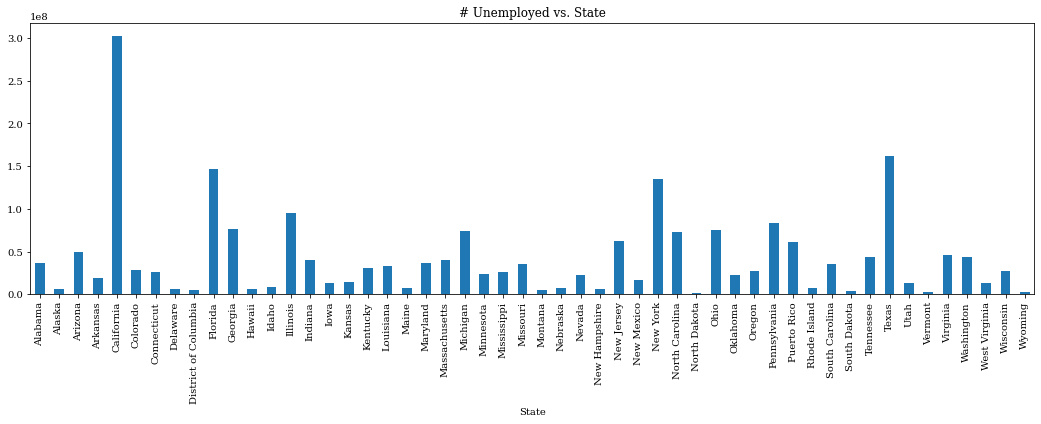

In [42]:
# Creates a unique list of each state
states = county_census_2017_df['State']
unique_states = []
states_list = [unique_states.append(state) for state in states if state not in unique_states]

''' Computes the number of unemployed individuals in state using %age unemployed '''
# creates a function to help find total number of people unemployed
def multiply(x,y):
    '''
    Multiplies two python values (in this case dataframe columns)
    in: df.column, df.column
    out: df.column
    '''
    return round(x*y)

county_census_2017_df['# Unemployed'] = multiply(county_census_2017_df['TotalPop'],county_census_2017_df['Unemployment'])

# aggregate by state, in order to determine metrics and visualize
state_vs_unemployed = county_census_2017_df.groupby(["State"])["# Unemployed"].agg('sum')


# Plot states by unemployment rates
state_vs_unemployed.plot.bar(figsize=(18,5))
plt.title('# Unemployed vs. State')


## Installation Bar Graphs

The bar graphs below display the current solar panel installation count by state in green, and then later overlays the potential solar panel installation count in red. The graphs serve two purposes: 1. To allow viewers to have a general idea of what key states have done or need to do the most work in solar panel deployment. As many of our later visualizations are maps of the US, indicating which important states to look at are valuable. 2. To emphasize the amount of work there is left to do in solar panel deployment, where even the most "green" states are only a tenth of the way to optimal development. 

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Current Installation')

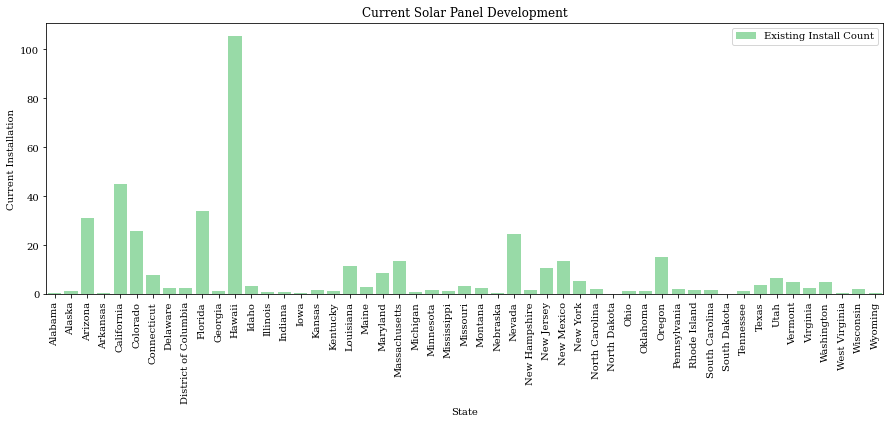

In [43]:
# create temporary mean solar installation dataframe by state
census2017_total_df = tract_join(sunroof_coverage_df, census2017_demography_df)
state_means = census2017_total_df.groupby("state_name").mean()

# utilize seaborn to plot current installations by state
plt.figure(figsize=(15,5))
sns.set_color_codes("pastel")
plt.rcParams['font.family'] = "serif"
sns.barplot(state_means.index, state_means.existing_installs_count, label="Existing Install Count", color= 'g')
plt.legend()
plt.xticks(rotation=90)
plt.title('Current Solar Panel Development')
plt.xlabel("State")
plt.ylabel("Current Installation")

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Current vs. Potential Installation')

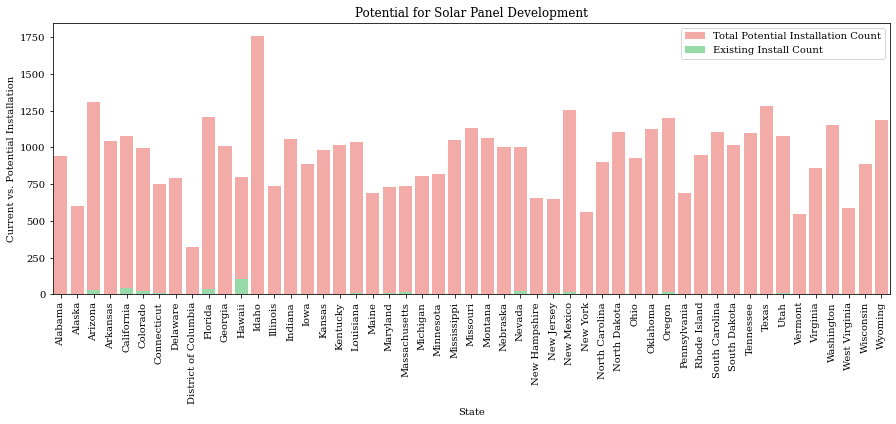

In [44]:
# utilize seaborn to overlay potential solar installations over current solar installations
plt.rcParams['font.family'] = "serif"
plt.figure(figsize=(15,5))

sns.set_color_codes("pastel")
sns.barplot(state_means.index, state_means.count_qualified,
            label="Total Potential Installation Count", color="r")
sns.barplot(state_means.index, state_means.existing_installs_count, label="Existing Install Count", color= 'g')
plt.legend()
plt.xticks(rotation=90)
plt.title("Potential for Solar Panel Development")
plt.xlabel("State")
plt.ylabel("Current vs. Potential Installation")


## Poverty vs. Unemployment

We previously saw which states have high unemployment levels, yet to round out our understanding of socioeconomic correlations, we included a visualization which compares unemployment and poverty in key regions of the US.

Text(0.5, 1.0, 'Poverty vs. Unemployment (US)')

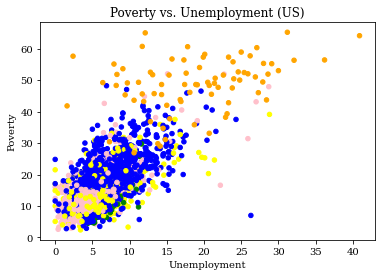

In [45]:
''' Generates scatterplot comparing poverty and unemployment levels in various regions '''
states = county_census_2017_df['State']
unique_states = []
states_list = [unique_states.append(state) for state in states if state not in unique_states]

# COLOR CODE:
    # Northeast - green
    # Midwest - pink
    # South - blue
    # West - yellow
    # Puerto Rico - orange
colors = {'Alabama':'blue','Alaska':'yellow','Arizona':'yellow', 'Arkansas': 'blue', 'California': 'yellow', 
         'Colorado': 'yellow', 'Connecticut': 'green', 'Delaware': 'blue', 'District of Columbia': 'blue',
         'Florida': 'blue', 'Georgia': 'blue', 'Hawaii': 'yellow', 'Idaho': 'yellow', 'Illinois': 'pink',
         'Indiana': 'pink', 'Iowa': 'pink', 'Kansas': 'pink', 'Kentucky': 'blue', 'Louisiana': 'blue',
         'Maine': 'green', 'Maryland': 'blue', 'Massachusetts': 'green', 'Michigan': 'pink', 'Minnesota': 'pink',
         'Mississippi': 'blue', 'Missouri': 'pink', 'Montana': 'yellow', 'Nebraska': 'pink', 'Nevada': 'yellow',
         'New Hampshire': 'green', 'New Jersey': 'green', 'New Mexico': 'yellow', 'New York': 'green',
         'North Carolina': 'blue', 'North Dakota': 'pink', 'Ohio': 'pink', 'Oklahoma': 'blue', 'Oregon': 'yellow',
         'Pennsylvania': 'green', 'Rhode Island': 'green', 'South Carolina': 'blue', 'South Dakota': 'pink', 
          'Tennessee': 'blue','Texas': 'blue', 'Utah': 'yellow', 'Vermont': 'green', 'Virginia': 'blue', 
          'Washington': 'yellow', 'West Virginia': 'blue', 'Wisconsin': 'pink', 
          'Wyoming': 'yellow', 'Puerto Rico': 'orange'}
county_census_2017_df['color'] = county_census_2017_df['State'].apply(lambda x: colors[x])


county_census_2017_df.plot.scatter(x='Unemployment', y='Poverty', c='color', colormap='viridis')
plt.title('Poverty vs. Unemployment (US)')

# Geovisualizations and Regression Plots
After our initial analysis on the basic correlations between different socioeconomic measures and also solar installation by state, we now dive deeper into relationships that may exist between the two datasets. We first try to answer the first research question by looking at yearly sunlight, solar installation, and carbon offset. Then, we look more into the second research question, identifying correlations between socioeconomic measures and solar panel deployment. 

## Solar Panel Installation + Yearly Sunlight

Trying to understand our first research question regarding efficiency of solar panels, we begin with looking at solar panel installation (the black dots) and yearly sunlight total (color of each state). After seeing this, we can notice that states in the South, particularly Florida have higher sunlight and solar panel installation. However, this correlation doesn't seem to hold in the Northeast region, which we believe can be explained by our further analysis related to socioeconomic factors.

Text(0.5, 1.0, 'Yearly Sunlight')

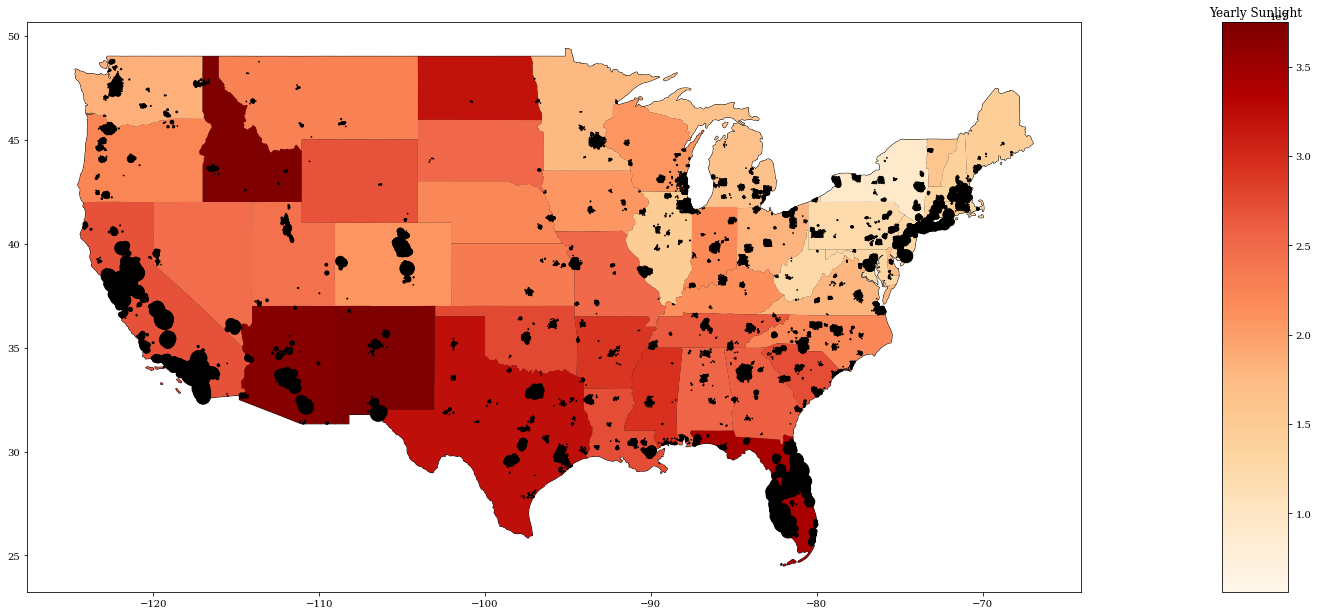

In [46]:
''' Creates map visualization depicting relationship between existing installation count and yearly sunlight in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

# create side bar that depicts yearly sunlight
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# create visualization
base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
# plot sunlight by state
states_combined_gdf.plot(ax=base, column='yearly_sunlight_kwh_total', marker = '.', cmap='OrRd', legend=True, cax=cax)
# plot solar panel installation counts
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Yearly Sunlight')

## Sunlight, Solar Installation, and Carbon Offset
After seeing the geovisualization above, we wanted to better understand the relationship on a census level, rather than having the sunlight being statewide. Furthemore, we wanted to look at the carbon offset of areas that have solar installation, and whether carbon offset changes with different amounts of sunlight. This resulted in three different visualizations that overlap carbon offset on top of solar installation on top of yearly sunlight.

Text(0.5, 1.0, 'Yearly Sunlight (Median kw)')

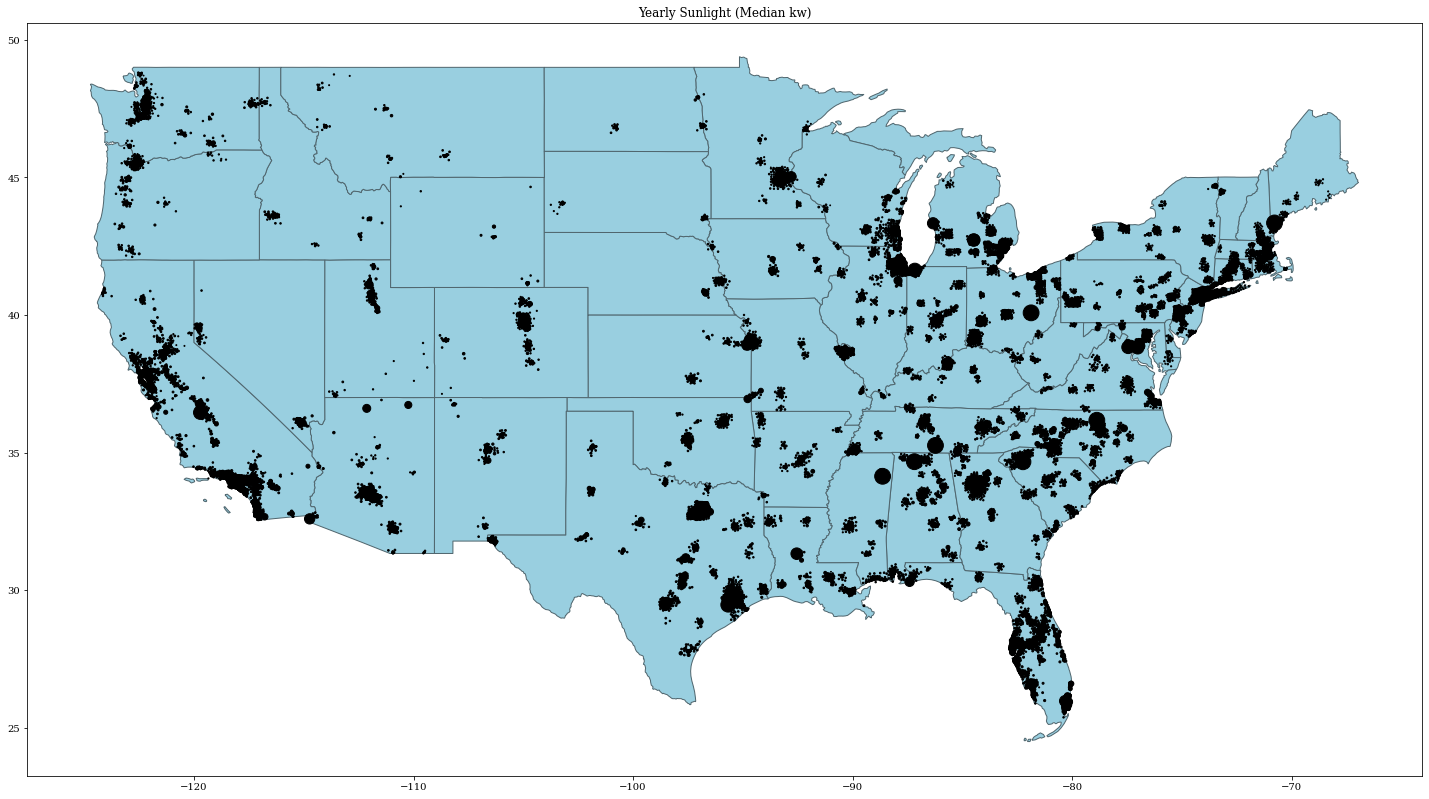

In [47]:
''' Creates map visualization depicting yearly sunlight in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))
base = states_combined_gdf.plot(ax=ax, color='#99cfe0', edgecolor='#50666e')

solar_gdf.plot(ax=base, marker = '.', color='black', markersize='kw_median')
plt.title('Yearly Sunlight (Median kw)')

Text(0.5, 1.0, 'Yearly Sunlight (Median kw) and Solar Installation Count')

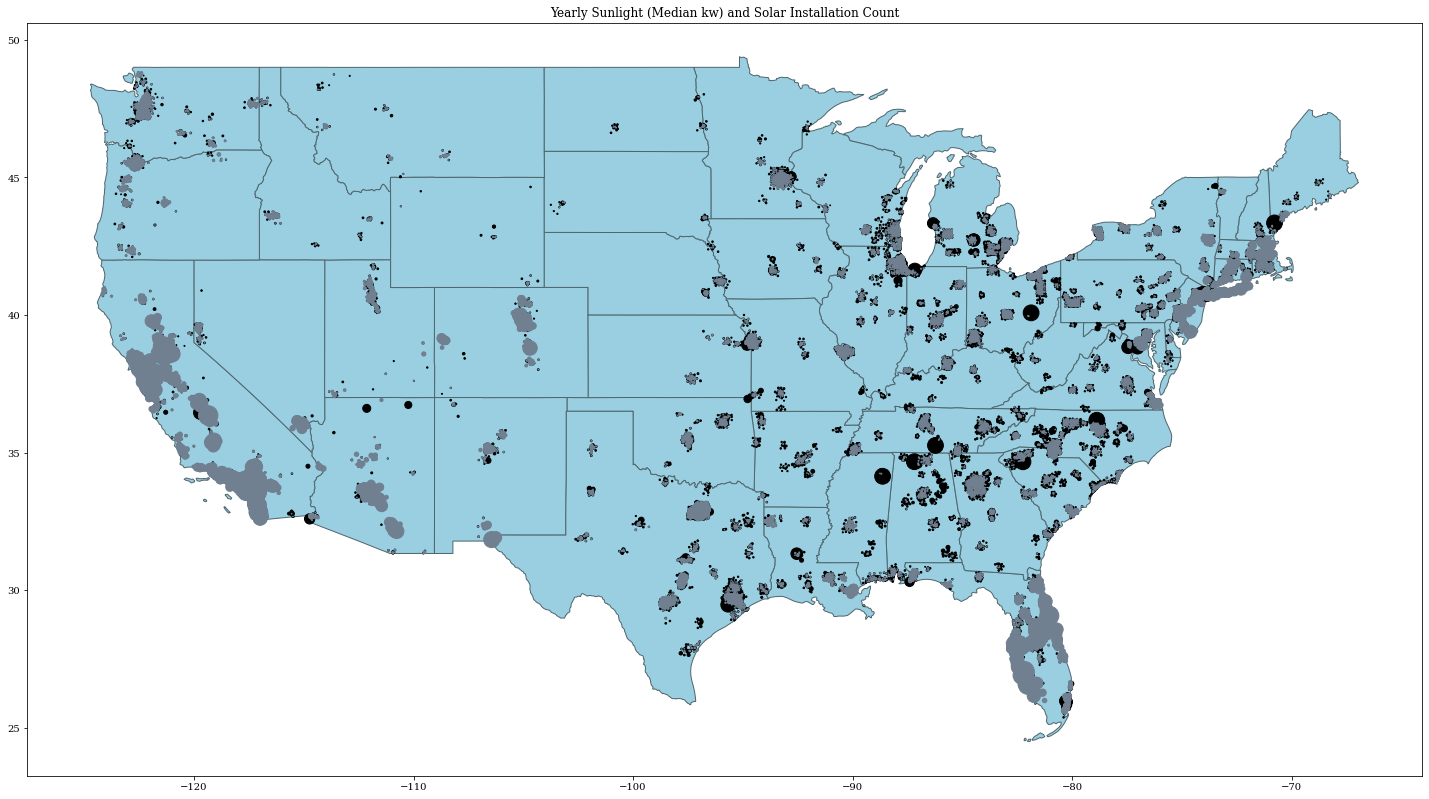

In [48]:
''' Creates map visualization depicting relationship between yearly sunlight and solar panel installations in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))
base = states_combined_gdf.plot(ax=ax, color='#99cfe0', edgecolor='#50666e')

solar_gdf.plot(ax=base, marker = '.', color='black', markersize='kw_median')
solar_gdf.plot(ax=base, marker = '.', color='slategrey', markersize='existing_scale')

plt.title('Yearly Sunlight (Median kw) and Solar Installation Count')

# Note: From this graph, we can see that California and the Northeast region have higher installation count 
# in proportion to the yearly sunlight, while the Southern states are not fully using the large amounts of 
# sunlight they have (hence the black that shows beyond the grey dots)

Text(0.5, 1.0, 'Yearly Sunlight (Median kw), Solar Installation, and Carbon Offset Metric')

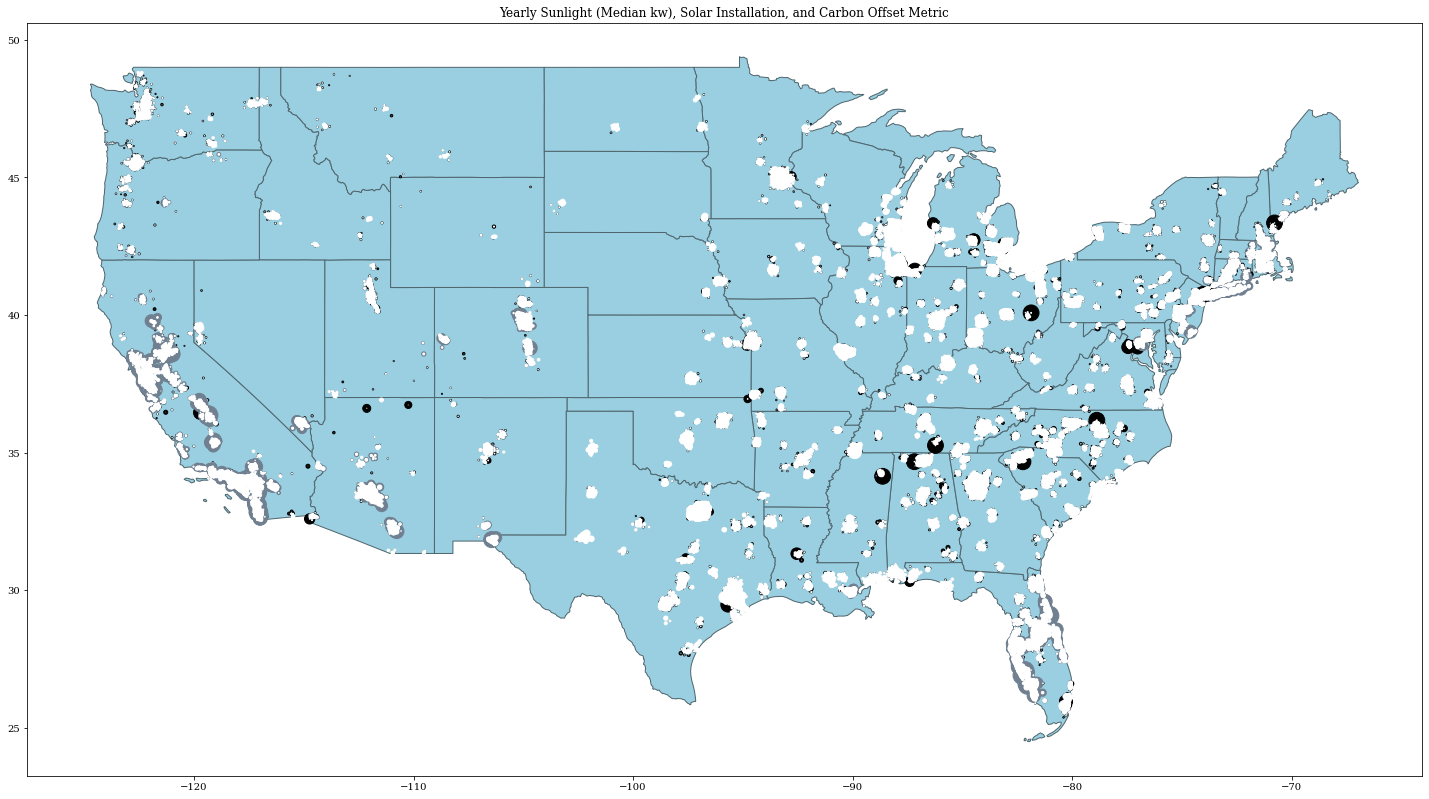

In [49]:
''' Creates map visualization depicting relationship between yearly sunlight, solar panel installations, and carbon offset in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))
base = states_combined_gdf.plot(ax=ax, color='#99cfe0', edgecolor='#50666e')

solar_gdf.plot(ax=base, marker = '.', color='black', markersize='kw_median')
solar_gdf.plot(ax=base, marker = '.', color='slategrey', markersize='existing_scale')
solar_gdf.plot(ax=base, marker = '.', color='white', markersize='carbon_scale')


plt.title('Yearly Sunlight (Median kw), Solar Installation, and Carbon Offset Metric')

# Note: From this graph, we find that carbon offset is highly correlated with solar panel installation (as epxected)

In [50]:
''' Combines dataframes containing census data and solar panel data into one dataframe to generate scatterplot'''
census2017_income_df['region_name'] = census2017_income_df['TractId']
census2017_income_df.index = census2017_income_df['region_name'] # sorts dataframe by tractID/region_name

geo_df.sort_values('region_name')
geo_df.index = geo_df['region_name']
geo_viz_df = geo_df
geo_viz_df = geo_viz_df.drop(columns = ['region_name']) # drops repeat column

combined_df = pd.concat([geo_viz_df, census2017_income_df], axis=1, join='inner') # combines dataframes
combined_df

<ipython-input-50-119611002ea9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census2017_income_df['region_name'] = census2017_income_df['TractId']


,state_name,lat_avg,lng_avg,count_qualified,existing_installs_count,percent_qualified,kw_median,carbon_offset_metric_tons,geometry,TractId,...,TotalPop,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,Employed,Unemployment,Weighted_Avg,region_name
region_name,,,,,,,,,,,,,,,,,,,,,
6037104401,California,34.267040,-118.432716,586,12,86.303387,7.25,2159.887389,POINT (-118.43272 34.26704),6037104401,...,3775,70147.0,14484.0,15647.0,1653.0,22.5,1699,11.1,2.648049e+08,6037104401
36055009400,New York,43.156368,-77.607040,369,4,85.813953,28.00,11392.316227,POINT (-77.60704 43.15637),36055009400,...,4590,16970.0,5569.0,29476.0,9932.0,43.6,1508,5.0,7.789230e+07,36055009400
17201000700,Illinois,42.277794,-89.066589,788,3,56.446991,5.25,6902.286133,POINT (-89.06659 42.27779),17201000700,...,3353,62715.0,5993.0,34837.0,4951.0,9.4,1963,11.9,2.102834e+08,17201000700
42003180300,Pennsylvania,40.422962,-79.993729,432,1,38.297872,3.25,3238.933474,POINT (-79.99373 40.42296),42003180300,...,2320,33533.0,7263.0,16719.0,2915.0,23.8,937,9.8,7.779656e+07,42003180300
6059086602,California,33.844044,-117.933113,827,32,90.382514,11.50,6111.873688,POINT (-117.93311 33.84404),6059086602,...,6505,53988.0,9649.0,18430.0,2047.0,19.2,3317,9.6,3.511919e+08,6059086602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48121020113,Texas,33.176277,-96.911400,1930,14,84.426947,7.50,10684.715336,POINT (-96.91140 33.17628),48121020113,...,12716,90960.0,9386.0,31420.0,2522.0,1.7,7004,5.4,1.156647e+09,48121020113
34027042302,New Jersey,40.838047,-74.476219,491,5,45.887850,6.25,13640.429234,POINT (-74.47622 40.83805),34027042302,...,3039,127381.0,14460.0,64489.0,7101.0,1.4,1634,3.9,3.871109e+08,34027042302
6037543322,California,33.852547,-118.256958,2098,18,96.548550,8.75,8901.367807,POINT (-118.25696 33.85255),6037543322,...,7348,81371.0,9062.0,33143.0,4256.0,4.4,3488,6.7,5.979141e+08,6037543322


/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations (estimate of buildings w/ solar panels)')

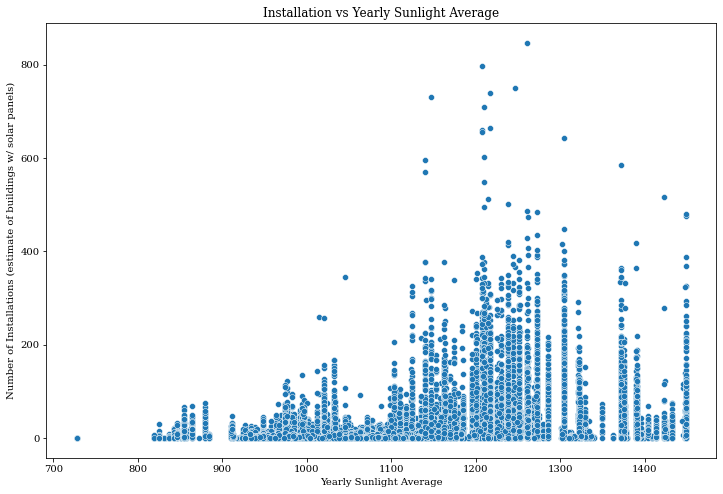

In [52]:
''' Generates scatterplot depicting the relationship between existing installation count and yearly sunlight average 
with each point representing a geographic census tract '''
sunroof_avg_df.index = sunroof_avg_df['region_name']  # changes index to region name
sunroof_avg_df = sunroof_avg_df.drop(columns = ['region_name'])

# combines sunroof dataframe with geographic dataframe
combined_sun_census_df = pd.concat([sunroof_avg_df, geo_viz_df], axis=1, join='inner')

x = combined_sun_census_df['yearly_sunlight_kwh_kw_threshold_avg']
y = combined_sun_census_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)
plt.title('Installation vs Yearly Sunlight Average')
plt.xlabel('Yearly Sunlight Average')
plt.ylabel('Number of Installations (estimate of buildings w/ solar panels)')


## Socioeconomic Factors and Solar Panel Deployment
In order to answer our second research question that correlates socioeconomic factors with solar panel installations, we created a number of layered geovisualizations in which the color of each state represents the demographic data, and the black dots are where solar panels are installed. For each geovisualization, we also used a scatter regression plot to better understand and quantify the correlations.

Text(0.5, 1.0, 'Poverty')

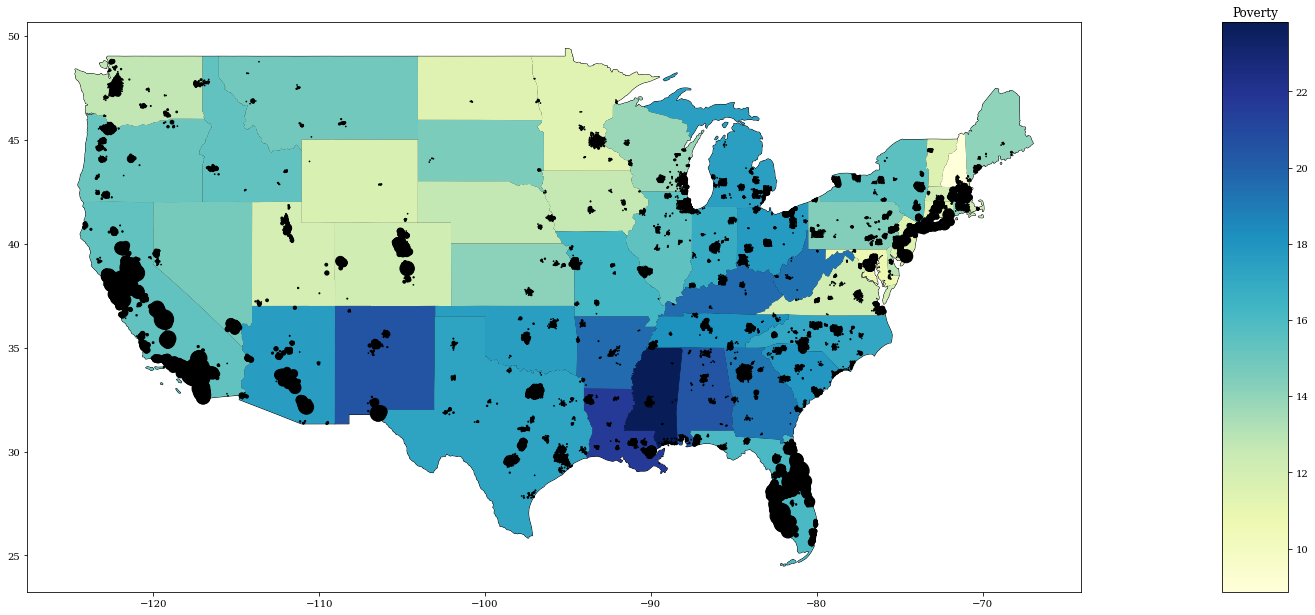

In [53]:
''' Creates map visualization depicting relationship between existing installation count and poverty in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='Poverty', marker = '.', cmap='YlGnBu', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Poverty')

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations')

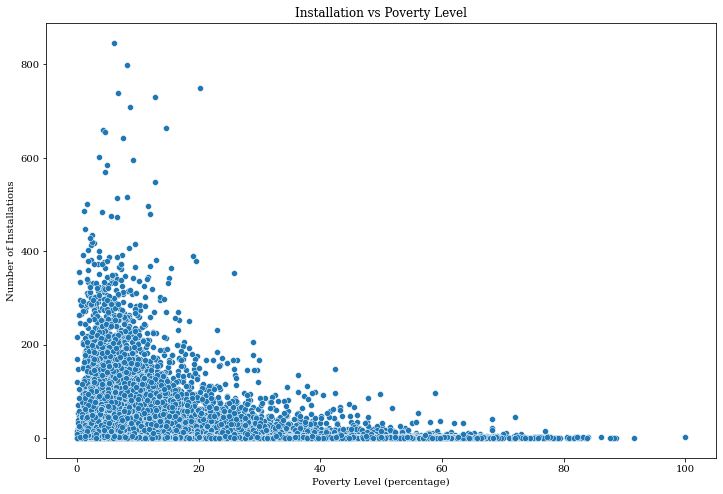

In [54]:
''' Generates scatterplot depicting the relationship between existing installation count and poverty level 
with each point representing a geographic census tract '''
x = combined_df['Poverty']
y = combined_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)
plt.title('Installation vs Poverty Level')
plt.xlabel('Poverty Level (percentage)')
plt.ylabel('Number of Installations')

Text(0.5, 1.0, 'Unemployment')

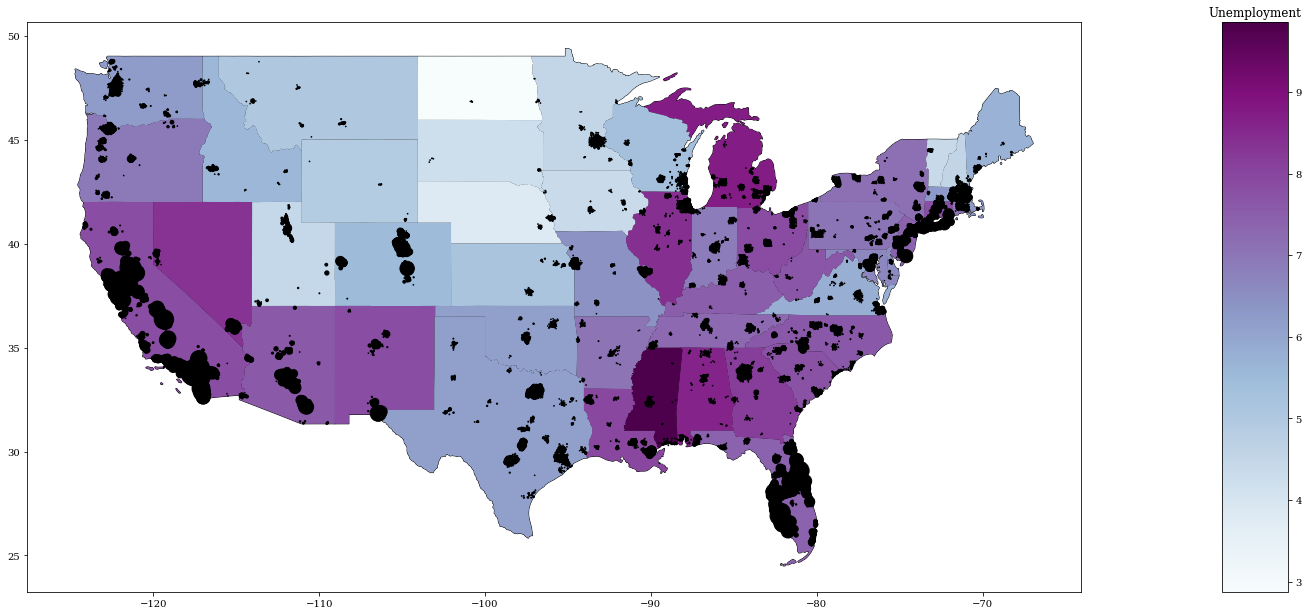

In [55]:
''' Creates map visualization depicting relationship between existing installation count and income per capita in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='Unemployment', marker = '.', cmap='BuPu', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='existing_scale')
plt.title('Unemployment')

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations')

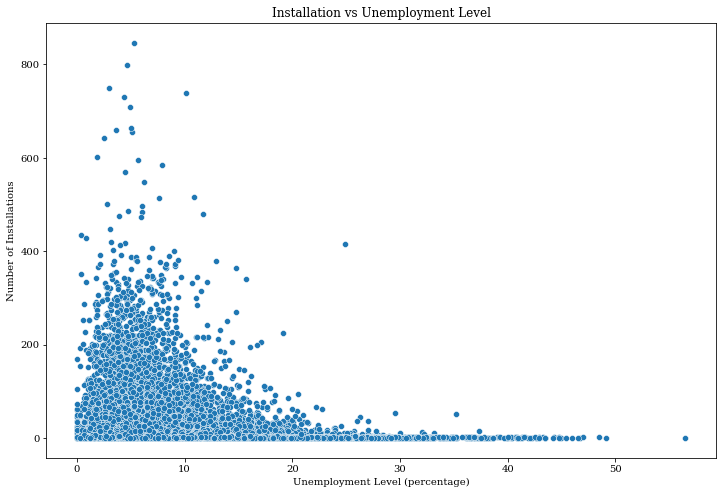

In [56]:
''' Generates scatterplot depicting the relationship between existing installation count and unemployment level 
with each point representing a geographic census tract '''
x = combined_df['Unemployment']
y = combined_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)
plt.title('Installation vs Unemployment Level')
plt.xlabel('Unemployment Level (percentage)')
plt.ylabel('Number of Installations')

Text(0.5, 1.0, 'Income Per Capita')

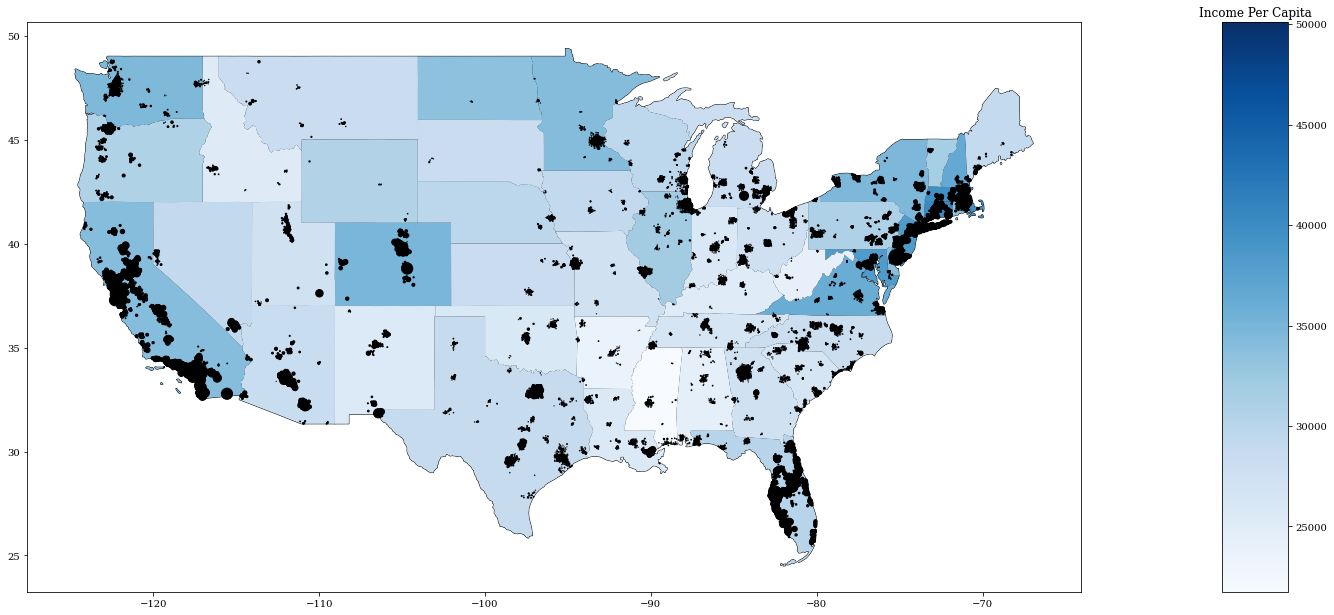

In [57]:
''' Creates map visualization depicting relationship between percentage of installations and income per capita in the U.S. '''
fig,ax = plt.subplots(figsize= (25, 25))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

base = states_combined_gdf.plot(ax=ax, color='white', edgecolor='black')
states_combined_gdf.plot(ax=base, column='IncomePerCap', marker = '.', cmap='Blues', legend=True, cax=cax)
solar_gdf.plot(ax=base, marker = '.', color='black', markersize='percent_install')
plt.title('Income Per Capita')

/Users/emilywang/opt/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Installations (estimate of buildings w/ solar panels)')

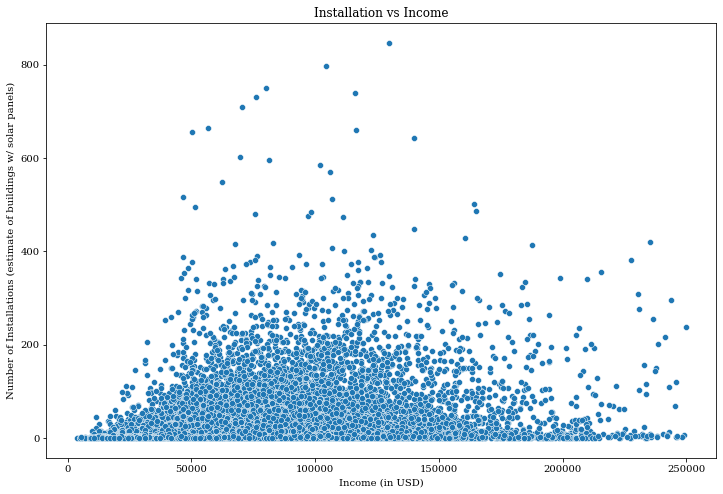

In [58]:
x = combined_df['Income']
y = combined_df['existing_installs_count']
plt.figure(figsize=(12,8))
sns.scatterplot(x, y)  # generates seaborn scatterplot
plt.title('Installation vs Income')
plt.xlabel('Income (in USD)')
plt.ylabel('Number of Installations (estimate of buildings w/ solar panels)')


<center> <h1> Conclusions </h1> </center>

**Research Question #1**: How does solar panel usage and solar panel/energy efficiency vary by geographic location?

To better understand how solar panel usage and solar energy efficiency varies by geographic location, we utilized the geopandas library to visually depict the relationships between variables such as solar panel installation and sunlight on a map of the United States. Generally, we found a strong positive correlation between average yearly average sunlight and the number of solar panel installations; this meant that areas that tend to receive more sunlight such as California and Florida also had many more installations. However, from the visualizations, it is evident that some locations do not follow this trend. For instance, although there are high levels of sunlight in Southern states such as Texas and Louisiana, the solar panel installation to sunlight proportion is lesser (meaning there is more sunlight but not as many installations as expected) than areas such as the Northeast and California. Since solar panel deployment is costly, this may be the result of lower income levels, lower unemployment levels and higher poverty levels in Southern states. Moreover, we found that yearly average sunlight and carbon offset are strongly correlated, meaning that areas with high levels of sunlight and a greater number of installations also had greater carbon offset. This result can be explained by how generally, high levels of sunlight increases the likelihood of solar panel installations, which results in more solar energy being utilized. Therefore, less nonrenewable energy is used, keeping more carbon out of the environment, and carbon offset is increased.

**Research Question #2**: In what ways are solar panel deployment correlated with socioeconomic measures (income, poverty, unemployment, etc.)?

Overall, from our scatterplots, we found that there was a slight positive correlation between income level and solar panel installation, meaning those from areas with high income levels tend to have more installations. We also found a strong negative correlation between poverty level and solar panel installation as well as between unemployment level and installation; such findings can be explained by the high costs of solar panel deployment. Generally, those from areas associated with lower income levels, higher poverty levels and higher unemployment levels are less likely to utilize, or have access to, solar panels. Installation count may drop significantly in regions with very low poverty or unemployment (such as the midwest), which may be explained by the lower levels of sunlight and fewer solar panel installations. This demonstrates that variables including sunlight levels, income, unemployment, and poverty are all contributing factors and work in conjunction with each other to explain whether solar panels are deployed.

<center> <h1> Use Cases </h1> </center>

<center> <h3> Individual vs Government Action </h3> </center>

From our conclusions, we believe that it is crucial that the government takes action in order to encourage more individual homeowners to install solar panels. In this sense, individual and government action go hand in hand. In general, we believe that investing more government money into renewable energy (specifically, solar panels) can be impactful in increasing solar panel deployment. In terms of individual homeowners, it appears to be that middle income families are most likely to deploy solar panels. This leads us to two questions on the 'homeowner' level: 1. how can we lower the costs and give access to lower-income families? 2. why are higher income families less likely to use solar panels, and is ther some sort of action that could encourage those who are wealthier to also deploy solar panels? We hope to address these in our policy suggestions.

<center> <h3> Homeowner Suggestions </h3> </center>

From the individual household perspective, we would suggest all homeowners to consider installing solar panels. After all, solar energy is 'free', and as apparent by the solar panel installations in areas with less sunlight such as the Northeastern region, the yearly sunlight really does not mean that you cannot install solar panels. In particular, we would encourage homeowners in Southern states such as Alabama, Carolinas, Mississippi, Georgia, Louisian, and also Arizona and New Mexico, to seriously consider using solar panels. Since there is so much yearly sunlight in those areas, using solar energy is likely to be more cost efficient, which benefits homeowners and helps the environment. Furthermore, individuals should try to understand the different incentive programs for solar panel installation, because they may significantly reduce the cost of installation and make the thought of installing solar panels less daunting/negative.


<center> <h3> Policy Suggestions </h3> </center>

<b> Current Policies </b>
As of right now, tax rebates on the federal and state levels are the primary way that homeowners can access government support in installing solar panels. Net metering and renewable energy portfolio programs also exist on the state-level but vary widely between states. However, the federal budget for subsidizing solar panel purchases has been decreasing over the past five years, which can deter homeowners to implement on in their home. "A solar PV system must be installed before December 31, 2019, to claim a 30% credit. It will decrease to 26% for systems installed in 2020 and to 22% for systems installed in 2021. And the tax credit expires starting in 2022 unless Congress renews it." These decreasing subsidies may significantly impact the willingness of homeowners to purchase solar panels. In addition, those looking to purchase a secondhand solar panel (not brand new) are unable to utilize the federal tax credit. This policy can limit those who want to help conserve energy and save on their electric bill, but do not make enough to support even a secondhand solar panel. That's why many of our suggestions are that the government continues to allocate more funding to solar energy.

<b> City Government: </b>
On the local, city government level, we suggest deploying solar panels to power municipal buildings, including schools, libraries, etc. Furthermore, local governments can use net metering to provide electricity bill credits for every unit of electricity generated by solar panels. This would provide more incentive for households to take up the cost of installing solar panels. Furthermore, if city utilities could have something similar to the state-level Renewable Portfolio Standard and require a certain portion of the city's electricity being produced by solar, this could significantly increase the carbon offset. If possible, this would make it more equitable since lower income households often don't have the financial flexibility to install solar panels themselves. Instead, the city can produce energy from solar power and distribute it to residents' houses. 

<b> State Government: </b>
For state government policies, we believe that allocating more funding towards solar and renewable energy would be beneficial. This additional funding could be used towards solar panel tax credis and rebates that would encourage more homeowners to consider using solar energy. Ideally, these tax credits could encourage individuals from all socioeconomic classes to deploy solar energy. Furthermore, expanding on the existing Renewable Portfolio Standards (RPS) [6] can encourage wider adoption of solar energy without homeowners having to actively install panels. The RPS requires utilities providers to produce a certain proportion of renewable energy. In order to encourage wealthier families to install solar panels, we encourage policies that would make sure that solar panels are the most cost effective now, and also in the future. Surveys suggest that high income households tend to worry about whether solar panels will be cost efficient in the future [7]. 

<b> Federal Government: </b>
In terms of national government policies and initiatives, we would suggest a progress tax credit system in which lower-income families would receive proportionally more tax rebates in comparison to wealthier, higher-income families. This would encourage more lower-income families to install solar panels, which could help reduce their electricity bills while also diminishing that gap in installments between different socioeconomic levels. Increasing tax credits and grants for second-hand solar panels could also make solar panels more financially accessible. Furthermore, by allocating more funding in general to renewable energy, and also targeting solar deployment in areas with more sunlight could significantly increase our carbon offset as a country. Ideally, states with higher levels of sunlight (i.e. Southern states) would receive slightly more financial support. Being able to maximize solar panel deployment is a crucial step given our current contribution as a country to global climate change.



<center> <h1> Limitations and Next Steps </h1> </center>

A few limitations of our research is that we only included three socioeconomic factors (income, poverty, and unemployment) while other demographic data could be more effective in understanding solar panel deployment. For example, in the future, it would be interesting to look at race, education, and political ideology as ways we can increase installation counts. In our research, we also did not include Puerto Rico, Alaska, and Hawaii which would be important to include if we wanted more comprehensive policy actions. Additionally, it can be hard to draw specific, numeric conclusions from our analysis such as which brackets of income should be targeted with more subsidies. Moreso, the Google Solar Project only covers 47742 out of 73057 census tracts which means it is missing a significant chunk of data.

From this research project, we believe that our findings can expand to many other real-world applications. Whether that be for other sources of energy, the impacts of climate change, or even diving deeper into the costs of solar panels.


<center> <h1> Author Contributions </h1> </center>

Catherine Quaintance - Policy suggestions, methodology, citations, demographic data source import and cleaning, demographic scatter plot visualizations (Research question #2) 

Hannah Reyes - Introduction, research questions, data sources & methods, demographic data source import and cleaning, demographic visualizations (Research question #2)


Marco Tortolani - Solar panel dataset import and cleaning, solar panel bar graph visualizations, code comment and markdown, creating geodataframes

Emily Wang - Analysis & results, conclusion, commenting on code, merging dataframes for and plotting scatterplots depicting relationships between variables

Xinyu Wu - Background and significance, creating geodataframes, merging dataframes and creating multi and single layer geovisualizations, use cases: policy suggestions / action steps, limitations & next steps

<center> <h1> Citations </h1> </center>

[1] Kennedy, Brian, and Cary Lynne Thigpen. “More U.S. Homeowners Say They Are Considering Home Solar Panels.” Pew Research Center, Pew Research Center, 14 Aug. 2020, www.pewresearch.org/fact-tank/2019/12/17/more-u-s-homeowners-say-they-are-considering-home-solar-panels/#:~:text=The%20same%20Pew%20Research%20Center,installed%20solar%20panels%20at%20home.  

[2] EnergySage, www.energysage.com/local-data/solar-panel-cost/ma/.

[3] “Homeowner’s Guide to the Federal Tax Credit for Solar Photovoltaics.” U.S. Department of Energy, Office of Energy Efficiency and Renewable Energy, www.energy.gov/sites/prod/files/2020/01/f70/Guide%20to%20Federal%20Tax%20Credit%20for%20Residential%20Solar%20PV.pdf. 

[4] “Solar Energy Is An Equity Issue.” Institute for Policy Studies, 27 Apr. 2017, ips-dc.org/solar-energy-is-an-equity-issue/.

[5] “Solar for Municipalities.” Solar United Neighbors, 11 Feb. 2021, www.solarunitedneighbors.org/go-solar/solar-for-municipalities/. 

[6] “The Federal and State Context: Policies Affecting Solar Energy Development.” SolSmart, solsmart.org/solar-energy-a-toolkit-for-local-governments/the-federal-and-state-context-policies-affecting-solar-energy-development/.

[7] “Why Do Low-Income Consumers Go Solar? Study Shows It's Not All About Saving Money.” EPIC, 17 Jan. 2020, epic.uchicago.edu/news/why-do-low-income-consumers-go-solar-study-shows-its-not-all-about-saving-money/. 
